In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#ratings = pd.DataFrame()
#for i in range(0,4):
#    if len(ratings) == 0:
#        ratings = pd.read_csv(r"data/user_genre_float/UserRatings_ByGenre" + str(i) + "_f.csv")
#    else:
#        ratings = pd.concat([ratings, pd.read_csv(r"data/user_genre_float/UserRatings_ByGenre" + str(i) + "_f.csv")])

In [3]:
ratings = pd.read_csv("data/UserRatings_ByGenre_all.csv")

In [4]:
clustering_tb = ratings.set_index(ratings.columns[0])

In [5]:
clustering_tb[:5]

,Demons,Super Power,Fantasy,Adventure,Harem,Slice of Life,Sports,Parody,Shounen,Shoujo,...,Mystery,Ecchi,Romance,Psychological,Thriller,Slice of Life,Fantasy,Space,Psychological,Action
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
dabakaguy,2.333333,0.0,1.452107,2.314815,1.116505,1.789474,2.142857,3.333333,0.000000,0.636364,...,1.627451,1.956522,1.020997,0.594595,0.0,1.529032,1.166667,2.033333,0.00,1.612195
AluPachi,4.666667,0.0,4.384314,4.679487,3.545455,5.062500,4.512195,1.666667,0.000000,4.827586,...,4.905405,2.846154,4.106109,2.919355,10.0,5.007937,3.666667,2.086957,4.50,3.975669
-Shido-,0.000000,7.0,4.771536,4.571429,5.846847,5.137255,5.122807,0.000000,2.333333,4.103448,...,4.607843,4.526316,5.072072,4.209302,9.0,3.814815,6.200000,4.050000,5.25,5.010395
BlairKS,0.000000,0.0,4.418440,4.945205,2.800000,5.060345,4.929825,0.000000,0.000000,3.152542,...,4.189655,4.444444,4.418972,4.190476,9.0,4.769231,1.333333,3.909091,3.50,4.141700
danidegraus,0.000000,0.0,1.656126,2.175258,1.365385,2.175676,4.142857,0.000000,0.000000,0.600000,...,0.959184,0.346154,1.734899,1.969697,9.0,2.136364,0.000000,0.692308,2.50,1.498715


In [6]:
for i in clustering_tb.columns:
    clustering_tb[i] = clustering_tb[i].map(lambda x: 10 if x > 10 else x)

In [7]:
clustering_tb.describe()

,Demons,Super Power,Fantasy,Adventure,Harem,Slice of Life,Sports,Parody,Shounen,Shoujo,...,Mystery,Ecchi,Romance,Psychological,Thriller,Slice of Life,Fantasy,Space,Psychological,Action
count,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,...,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000,108709.000000
mean,1.409028,0.293944,5.085965,5.254526,4.153316,4.567879,3.798954,0.978091,0.311336,4.233282,...,4.723367,2.840946,5.023288,4.886593,3.296917,4.335366,2.424339,3.210740,2.308557,5.136084
std,2.820962,1.463869,2.397114,2.499980,2.958995,2.844260,3.278981,2.511522,1.503638,2.959097,...,2.685540,3.186280,2.407755,2.736111,4.443105,2.838083,3.089606,3.322350,3.409210,2.319779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.592593,3.757576,1.216667,2.421053,0.000000,0.000000,0.000000,1.458333,...,2.846154,0.000000,3.478261,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.681818
50%,0.000000,0.000000,5.403226,5.666667,4.535211,4.923077,4.000000,0.000000,0.000000,4.571429,...,5.000000,1.166667,5.342105,5.200000,0.000000,4.625000,0.000000,2.461538,0.000000,5.421053
75%,0.000000,0.000000,6.821429,7.062500,6.503597,6.810811,6.750000,0.000000,0.000000,6.666667,...,6.777778,5.800000,6.806283,7.000000,9.000000,6.600000,5.000000,6.218750,5.000000,6.818182
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
from sklearn.cluster import KMeans

In [9]:
Sum_of_squared_distances = []
fig = plt.figure(figsize=(10, 6))
for i in tqdm(range(1, 10)):
    km = KMeans(n_clusters=i, 
                init='k-means++',
                random_state=0)
    km.fit(clustering_tb)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(range(1, 20), Sum_of_squared_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

NameError: name 'tqdm' is not defined

<Figure size 720x432 with 0 Axes>

In [10]:
km_5 =  KMeans(n_clusters=5, 
                init='k-means++',
                random_state=0)
km_5.fit(clustering_tb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [36]:
cluster_df = pd.DataFrame(km_5.cluster_centers_, columns=clustering_tb.columns)

In [37]:
group_list = ["Sci-Fi Junkies","No Preference","Haters","Lively Youth","Hot Blood Fighters"]
group_favorites = pd.DataFrame( columns=group_list,
                                index = ["First", "Second", "Third"])
for i, group_name in enumerate(group_list):
    ss = cluster_df.iloc[i].sort_values(ascending = False)
    for j in range(0,3):
        group_favorites[group_name].iloc[j] = (ss[:3].index[j] ,np.round(ss[:3].values[j],2))

group_favorites

,Sci-Fi Junkies,No Preference,Haters,Lively Youth,Hot Blood Fighters
First,"( Thriller, 7.27)","( Comedy, 4.61)","( Comedy, 1.53)","( Drama, 7.1)","(Thriller, 6.19)"
Second,"( Military, 7.13)","( Shounen, 4.6)","( Shounen, 1.48)","( Adventure, 7.07)","( Thriller, 5.31)"
Third,"( Drama, 7.1)","( Adventure, 4.51)","(Action, 1.44)","( Shounen, 7.04)","( Adventure, 5.19)"


In [20]:
ss[-3:]

5.1926811754474365

In [16]:
for i in range(len(cluster_df)):
    ss = cluster_df.iloc[i].sort_values()
    print("group"+str(i)+"'s top3:")
    print(np.round(ss[-3:],2))
    #print(np.round(ss[-3:],2),"\n")
    #print("worst3",)
    #print(np.round(ss[:3],2),"\n")

group0's top3:
 Drama       7.10
 Military    7.13
 Thriller    7.27
Name: 0, dtype: float64
group1's top3:
 Adventure    4.51
 Shounen      4.60
 Comedy       4.61
Name: 1, dtype: float64
group2's top3:
Action      1.44
 Shounen    1.48
 Comedy     1.53
Name: 2, dtype: float64
group3's top3:
 Shounen      7.04
 Adventure    7.07
 Drama        7.10
Name: 3, dtype: float64
group4's top3:
 Adventure    5.19
 Thriller     5.31
Thriller      6.19
Name: 4, dtype: float64


# Visulize by PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA()

In [75]:
ratings_pca = pca.fit_transform(clustering_tb)

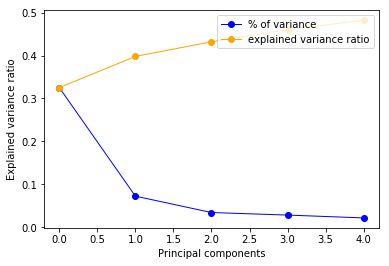

In [76]:
plt.plot(range(0, 5), pca.explained_variance_ratio_[:5], 'ro-', 
         linewidth=1, color = "blue", label = "% of variance")
plt.plot(range(0, 5), np.cumsum(pca.explained_variance_ratio_[:5]) , 
         'ro-', linewidth=1, color = "orange" , label = "explained variance ratio")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'upper right')
#plt.xlim([1,142])
plt.show()

In [86]:
PCs = pd.DataFrame(ratings_pca)

In [88]:
PCs

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-19.336512,-5.166821,-2.823003,-1.758007,3.134571,1.039184,-1.972184,0.061180,-2.544602,2.617592,...,0.406926,-0.031333,-0.208774,-0.217944,-0.041064,-0.204172,-0.013262,0.067724,-0.048552,-0.004882
1,0.157484,-9.650841,1.743628,-1.416709,2.546266,-0.535937,4.936949,1.913245,-2.572794,1.204809,...,-0.017007,0.022611,0.221099,0.167940,-0.114663,-0.636612,0.043199,0.372468,-0.045519,-0.014306
2,2.909748,-6.983163,6.210231,-0.294178,4.482635,0.718174,-1.009953,-1.036710,-0.558476,-1.200001,...,-0.410897,-0.071445,0.164989,0.253878,0.144204,-0.388362,-0.227640,0.037604,-0.016650,-0.012644
3,-0.981546,-7.067917,4.548526,-0.845427,2.157249,0.354081,4.182361,-2.527791,1.538490,1.757589,...,0.083040,-0.034011,-0.258425,0.200726,-0.287889,0.003327,-0.139948,0.176707,0.012527,0.002128
4,-19.725460,-7.111072,5.989133,0.922522,0.109961,-0.751973,1.183722,0.166120,0.108118,-0.378537,...,0.383536,0.067146,-0.034429,-0.031211,-0.243276,0.008603,0.018083,-0.021966,-0.006732,0.002373
5,-14.280199,-7.723088,4.050714,1.252527,0.329919,-2.857617,1.618745,3.400155,-3.755755,-0.508804,...,0.133314,0.114591,0.000333,0.596757,-0.049334,-0.104636,-0.084884,0.182441,-0.025647,-0.014277
6,7.208217,-10.925876,-4.086760,-1.995653,0.677508,1.122419,3.049447,5.671646,-3.174536,0.159393,...,0.422741,-0.026285,-0.212975,0.039238,0.032517,-0.723157,0.006406,0.015241,0.820019,-0.019386
7,3.494769,-10.125610,-1.807685,-2.625827,5.280185,-3.099728,2.622934,1.203155,-10.154793,0.978451,...,0.163586,0.218638,-0.092842,-0.102121,-0.392483,-0.904541,-0.196187,0.244123,-0.006992,-0.055630
8,-3.558799,-6.783543,2.648817,1.309067,1.406441,0.416685,1.983368,4.216068,-1.026692,-0.396462,...,-0.087862,0.080053,0.452933,0.105002,-0.371733,-0.443643,-0.035123,0.158361,0.000142,-0.033862
9,-0.836534,-2.536920,2.321140,-3.098301,1.856480,-1.162966,-0.627553,0.291629,-4.400542,1.756728,...,-0.451967,0.226002,0.491708,0.077738,-0.336564,0.077243,-0.000613,-0.212962,-0.011351,0.006907


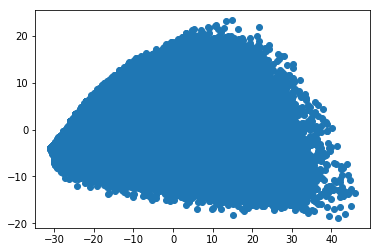

In [90]:
plt.scatter(PCs[0], PCs[1])
#plt.xlim(-5, 5)
#plt.ylim(-2, 2)

In [91]:
c_preds = km_5.predict(clustering_tb)

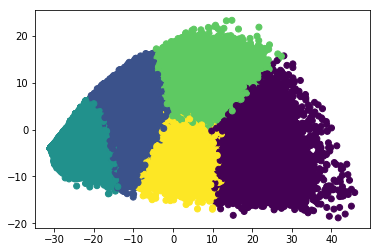

In [92]:
plt.scatter(PCs[0], PCs[1], c = c_preds)

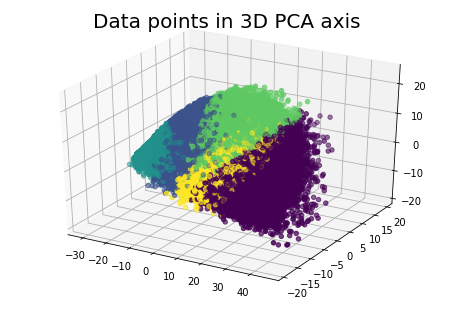

In [94]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PCs[0], PCs[2], PCs[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()